The Adult Income Dataset contains demographic and employment information collected from the U.S. Census. In this project, Decision Tree classifiers (CART using Gini index and ID3 using Entropy) are used to predict whether an individual earns more than $50,000 per year. The study compares the performance of CART and ID3 models using standard evaluation metrics.

## 1. Import Required Libraries

In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    roc_curve
)

sns.set_style("whitegrid")


## 2. Load the Dataset


In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/AdnanZamanNiloy/Decision-Tree-CART-vs-ID3/refs/heads/main/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## 3.Basic Dataset Inspection

In [29]:
df.shape

(32561, 15)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [31]:
df.describe()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## 4.Missing Value Handling

In [32]:
df.replace("?",np.nan,inplace=True)
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [33]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

## 5.Encoding Categorical Features

In [34]:
cat_cols=df.select_dtypes(include="object").columns
cat_cols

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [35]:
le = LabelEncoder()
for col in cat_cols:
    df[col]=le.fit_transform(df[col])

## 6. Feature–Target Split

In [36]:
X=df.drop("income",axis=1)
y=df["income"]

## 7. Train–Test Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

## 8. CART (Gini) – Model & Hyperparameter Tuning

In [38]:
cart = DecisionTreeClassifier(
    criterion="gini",
    random_state=42
)

cart_params = {
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [1, 5, 10]
}

cart_grid = GridSearchCV(
    cart,
    cart_params,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

cart_grid.fit(X_train, y_train)
best_cart = cart_grid.best_estimator_

cart_grid.best_params_


{'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 5}

##9. ID3 (Entropy) – Model & Hyperparameter Tuning

In [39]:
id3 = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)

id3_params = {
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [1, 5, 10]
}

id3_grid = GridSearchCV(
    id3,
    id3_params,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

id3_grid.fit(X_train, y_train)
best_id3 = id3_grid.best_estimator_

id3_grid.best_params_


{'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 5}

## 10.Predictions & Probabilities

In [40]:

y_pred_cart = best_cart.predict(X_test)
y_prob_cart = best_cart.predict_proba(X_test)[:, 1]


y_pred_id3 = best_id3.predict(X_test)
y_prob_id3 = best_id3.predict_proba(X_test)[:, 1]




## 11.Confusion Matrix (2×1 Comparison)

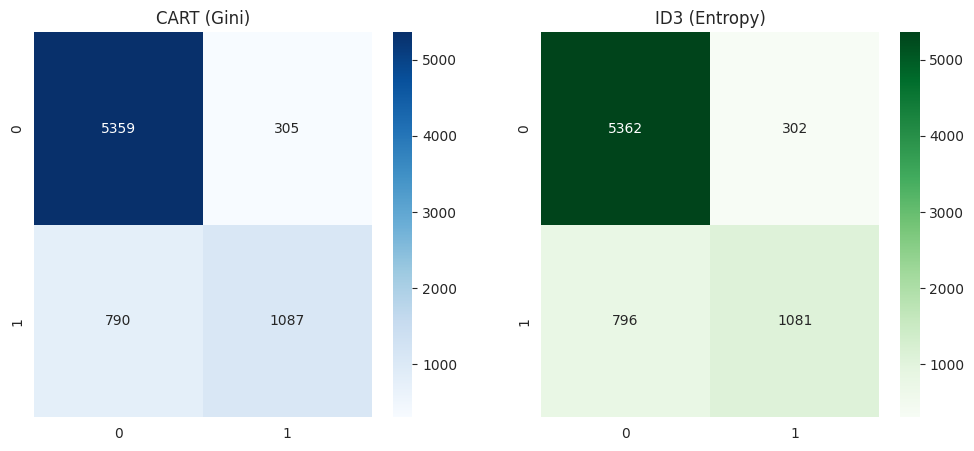

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_cart),
            annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("CART (Gini)")

sns.heatmap(confusion_matrix(y_test, y_pred_id3),
            annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("ID3 (Entropy)")

plt.show()


## 12. ROC Curve (2×1 Comparison)

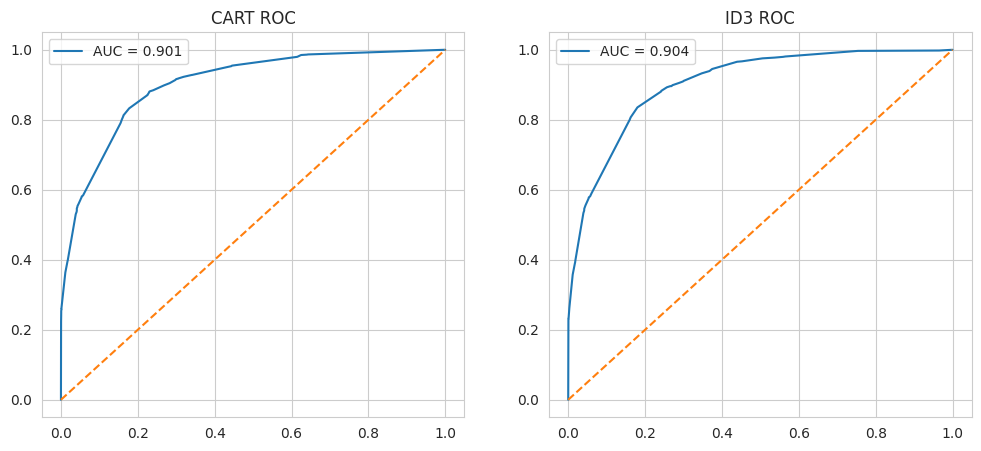

In [42]:
fpr_c, tpr_c, _ = roc_curve(y_test, y_prob_cart)
fpr_i, tpr_i, _ = roc_curve(y_test, y_prob_id3)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(fpr_c, tpr_c, label=f"AUC = {roc_auc_score(y_test, y_prob_cart):.3f}")
ax[0].plot([0,1], [0,1], "--")
ax[0].set_title("CART ROC")
ax[0].legend()

ax[1].plot(fpr_i, tpr_i, label=f"AUC = {roc_auc_score(y_test, y_prob_id3):.3f}")
ax[1].plot([0,1], [0,1], "--")
ax[1].set_title("ID3 ROC")
ax[1].legend()

plt.show()


## 13.Evaluation Metrics (Combined Bar Chart)

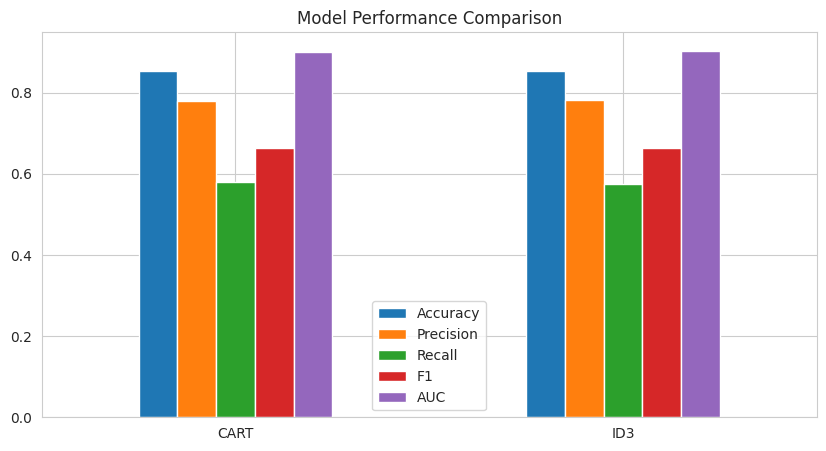

In [43]:
metrics_df = pd.DataFrame({
    "Accuracy": [
        accuracy_score(y_test, y_pred_cart),
        accuracy_score(y_test, y_pred_id3)
    ],
    "Precision": [
        precision_score(y_test, y_pred_cart),
        precision_score(y_test, y_pred_id3)
    ],
    "Recall": [
        recall_score(y_test, y_pred_cart),
        recall_score(y_test, y_pred_id3)
    ],
    "F1": [
        f1_score(y_test, y_pred_cart),
        f1_score(y_test, y_pred_id3)
    ],
    "AUC": [
        roc_auc_score(y_test, y_prob_cart),
        roc_auc_score(y_test, y_prob_id3)
    ]
}, index=["CART", "ID3"])

metrics_df.plot(kind="bar", figsize=(10,5))
plt.title("Model Performance Comparison")
plt.xticks(rotation=0)
plt.show()


## 14.Decision Boundary

### 14.1 Select Two Features

In [44]:
features_2d = ["age", "hours.per.week"]

X2 = df[features_2d]
y2 = y

In [45]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.25, random_state=42, stratify=y2
)


### 14.2 Retrain Models on 2 Features

In [46]:
cart_2d = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    random_state=42
)

id3_2d = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    random_state=42
)

cart_2d.fit(X2_train, y2_train)
id3_2d.fit(X2_train, y2_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

### 14.3 Decision Boundary Plot (2×1)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


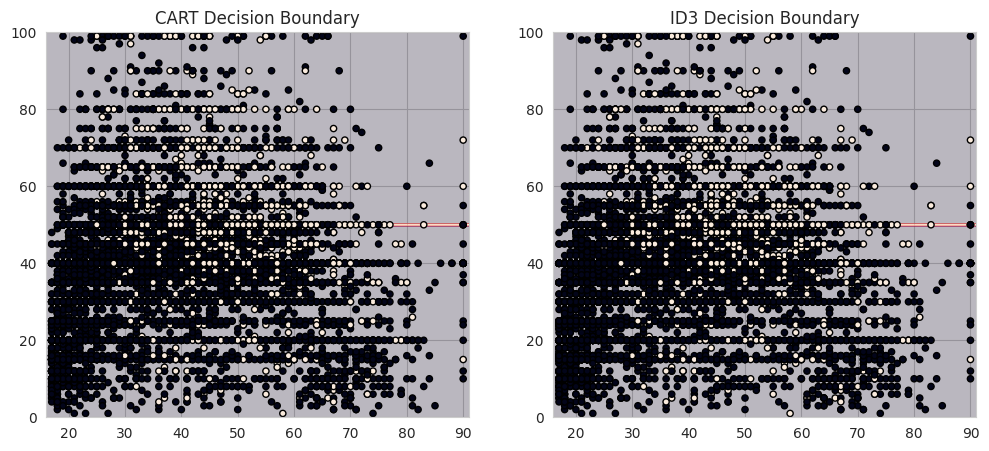

In [47]:
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X.iloc[:,0].min()-1, X.iloc[:,0].max()+1
    y_min, y_max = X.iloc[:,1].min()-1, X.iloc[:,1].max()+1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X.iloc[:,0], X.iloc[:,1], c=y, edgecolor="k", s=20)
    ax.set_title(title)

fig, ax = plt.subplots(1, 2, figsize=(12,5))

plot_decision_boundary(cart_2d, X2_train, y2_train, ax[0], "CART Decision Boundary")
plot_decision_boundary(id3_2d, X2_train, y2_train, ax[1], "ID3 Decision Boundary")

plt.show()


## 15. Decision Tree Structure Visualization

### 15.1 Cart Decision Tree Structure

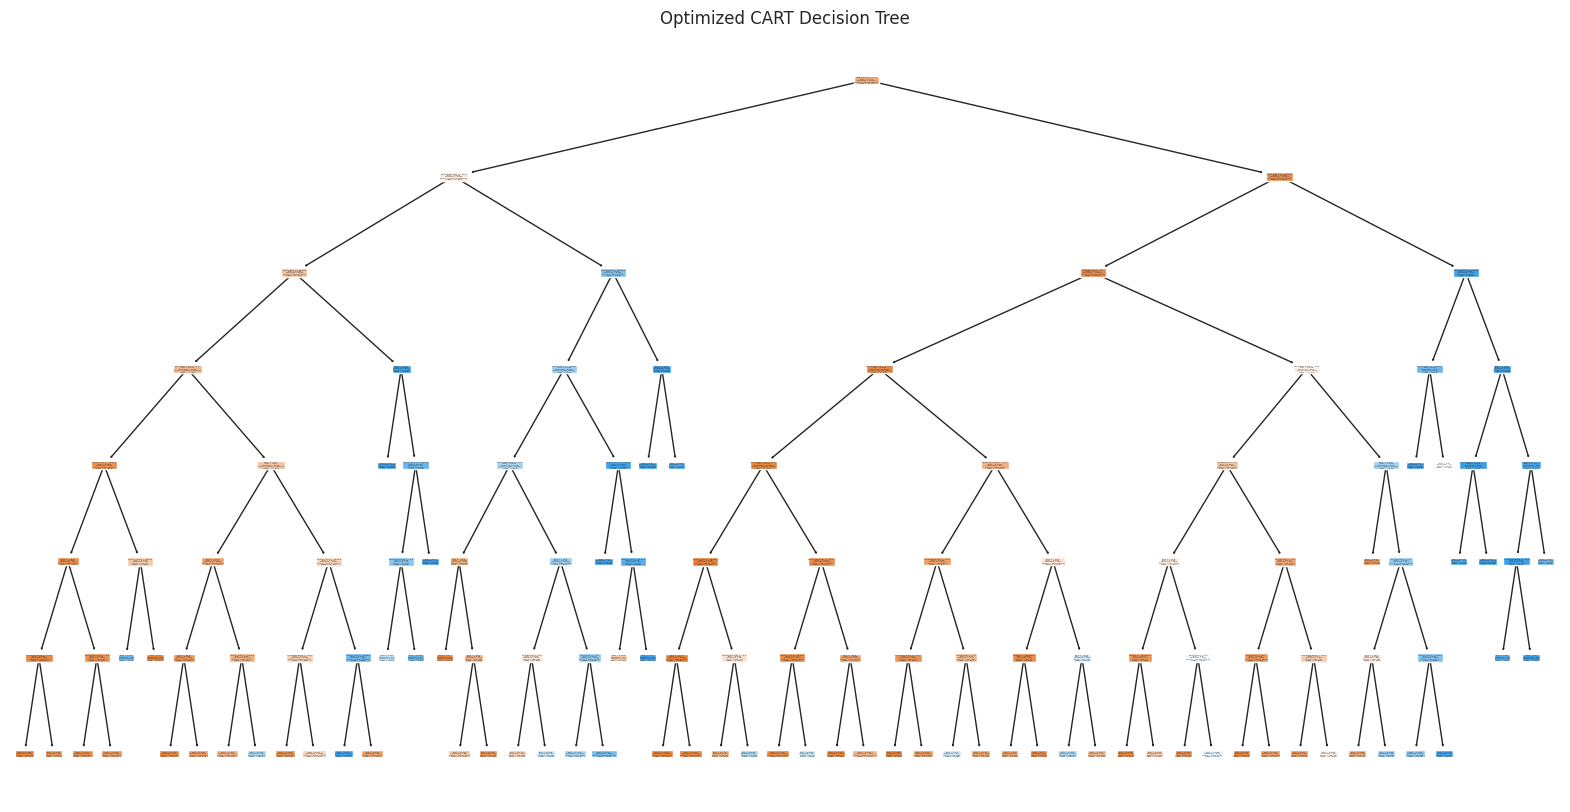

In [48]:
plt.figure(figsize=(20,10))
plot_tree(
    best_cart,
    feature_names=X.columns,
    class_names=["<=50K", ">50K"],
    filled=True
)
plt.title("Optimized CART Decision Tree")
plt.show()


### 15.2 ID3 Decision Tree Structure

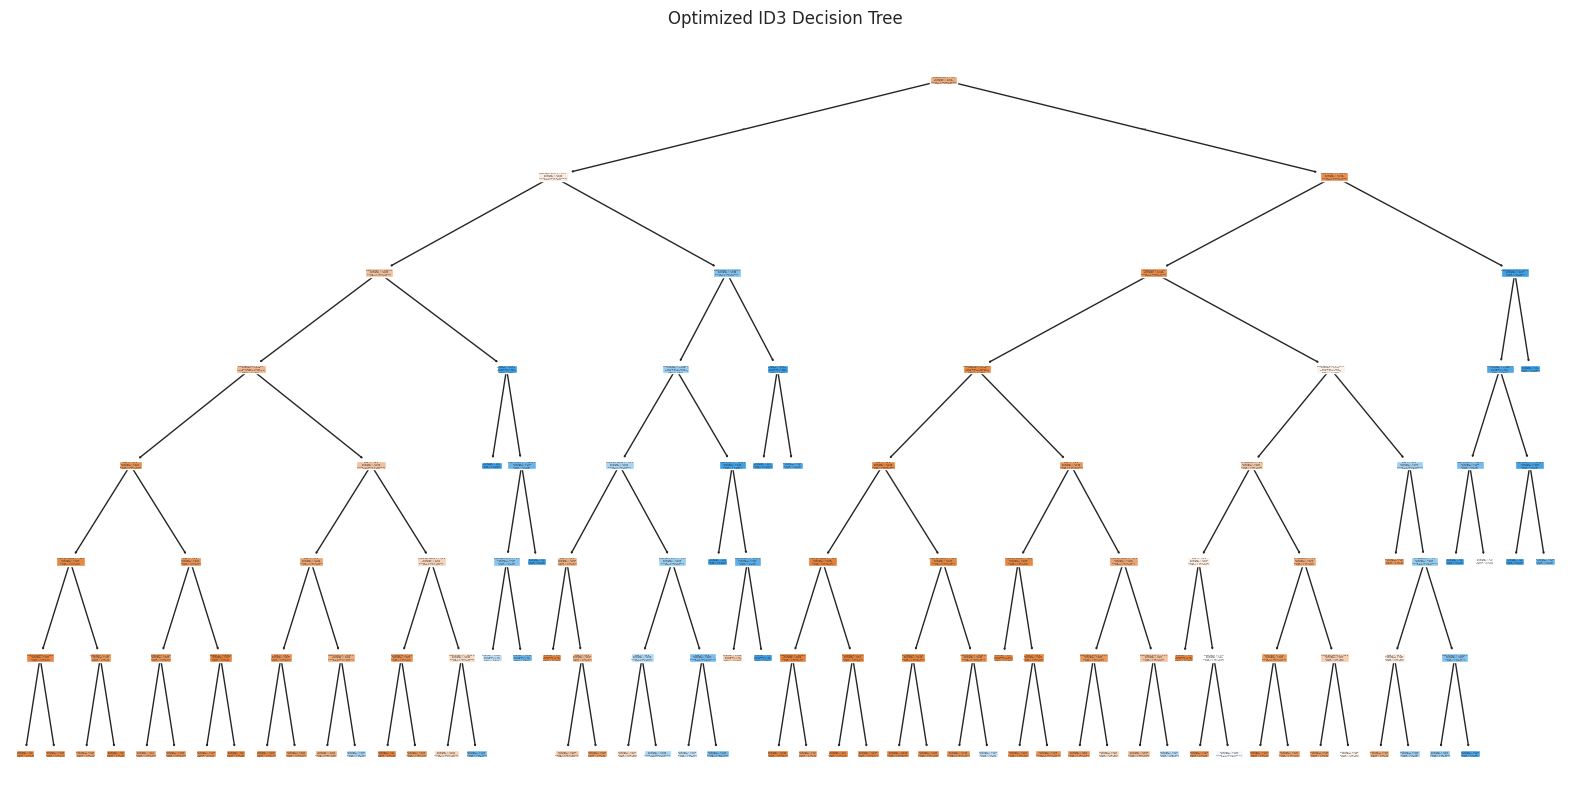

In [49]:
plt.figure(figsize=(20,10))
plot_tree(
    best_id3,
    feature_names=X.columns,
    class_names=["<=50K", ">50K"],
    filled=True
)
plt.title("Optimized ID3 Decision Tree")
plt.show()